### ISYE 6740 - Machine Learning

#### Homework 6 - Graham Billey

**1) Neural networks.**

**a) Consider a neural network for binary classification using a sigmoid function for each unit. If the neural network has no hidden layer, explain why the model is equvalent to logistic regression.**

------

Logistic regression is a statistical method used to model the probabilty of an event based on a function of input variables. Specifically, this model assumes a linear relationship between the predictor variables and the _**log-odds**_ of the event happening.

The standard function used is the logit function (a type of sigmoid function), where the probability of the event $\sigma$ is given below.

$$ \sigma = \frac{1}{1+e^{-w^T x}} $$

In a neural network with no hidden layer, the inputs are fed directly into the final decision-making neuron. If this neuron uses the logit function to calculalte the final probability, then it is modeling the log-odds of the probabilty of the event using a linear combination of the inputs. This is exactly what happend in logistic regression.

If there were hidden layers, then the inputs to the final neuron would not be the raw inputs to the model, but they would be probabilities calculated from other neurons. 

Therefore if there is no hidden layer, the neural net is equivalent to logistic regression.

**b) Consider the simple 2-layer neural network from the lecture slides.** Given the cost function used to train the network:

$$ l(w, \alpha, \beta) = \sum_{i=1}^m (y^i - \sigma(w^T z^i))^2 $$

where $\sigma(x) = 1/(1+e^{-x})$ is the sigmoid function. show that the gradient is given by:

$$ \frac{\partial l}{\partial w} = -\sum_{i=1}^m 2 (y^i - \sigma(u^i))\sigma(u^i)(1-\sigma(u^i))z^i $$

where $z_1^i = \sigma(\alpha^T x^i)$, $z_2^i = \sigma(\beta^T x^i)$. Also find the gradient of $l$ with respect to $\alpha$ and $\beta$.

------

First, we will calculate $\large \frac{\partial \sigma(u)}{\partial u}$...

$ \sigma (u) = \large \frac{1}{1 + e^{-u}} = (1 + e^{-u})^{-1} $

Therefore, 

$ \large \frac{\partial \sigma(u)}{\partial u} = -(1 + e^{-u})^{-2} * (-e^{-u}) = \frac{e^{-u}}{(1+e^{-u})^2}$

Also note,

$ 1 - \sigma(u) = \large 1 - \frac{1}{1+e^{-u}} = \frac{e^{-u}}{1+e^{-u}} $

Thus, 

$ \large \frac{\partial \sigma(u)}{\partial u} = \frac{e^{-u}}{(1+e^{-u})^2} = (\frac{e^{-u}}{1+e^{-u}})*(\frac{1}{1+e^{-u}}) = (1 - \sigma(u))\sigma(u) $


------

Now, we can use that definition to calculate the gradients of $l$ with respect to $w$, $\alpha$, and $\beta$.

Let $ \large u = w^T z^i$...

$ \large \frac{\partial l}{\partial w} = \sum_{i=1}^m 2(y^i - \sigma(u))(-\frac{\partial}{\partial u} \sigma(u)) \frac{\partial u}{\partial w} $

$ \large = -\sum_{i=1}^m 2 (y^i - \sigma(u))\sigma(u)(1-\sigma(u))z^i $

------

Let $ \large z_1 = \sigma(\alpha^T x) = \frac{1}{1+ e^{-\alpha^T x}} $.

Then $ \large \frac{\partial z_1}{\partial \alpha} = \sigma(\alpha^T x)(1 - \sigma(\alpha^T x))(x)$

Also from the derivation above $ \large \frac{\partial l}{\partial z_1} = -\sum_{i=1}^m 2 (y^i - \sigma(u))\sigma(u)(1-\sigma(u))w_1$

Putting it all together...

$ \large \frac{\partial l}{\partial \alpha} = \frac{\partial l}{\partial z_1} \frac{\partial z_1}{\partial \alpha} $

$ \large = -\sum_{i=1}^m 2 (y^i - \sigma(w_1^T z_1^i))\sigma(w_1^T z_1^i)(1-\sigma(w_1^T z_1^i))w_1 \sigma(\alpha^T x)(1 - \sigma(\alpha^T x))(x) $

Similarly...

$ \large \frac{\partial l}{\partial \beta} = \frac{\partial l}{\partial z_2} \frac{\partial z_2}{\partial \beta} $

$ \large = -\sum_{i=1}^m 2 (y^i - \sigma(w_2^T z_2^i))\sigma(w_2^T z_2^i)(1-\sigma(w_2^T z_2^i))w_2 \sigma(\beta^T x)(1 - \sigma(\beta^T x))(x) $


**2) Comparing SVM and simple neural networks.** 

This question is to implement and compare SVM and a simple neural network for two datasets. You may use `sklearn.neural_network` with `hidden_layer_sizes=(5, 2)`. Tune the step size so you have reasonable results. You may use `svc` and tune the penalty term `C` to get reasonable results.

**Part One (Divorce Classification/Prediction).**

This dataset is about participants who completed the personal information form and a divorce predictors scale. 

The data is a modified version of the publicly available `https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set`. There are 170 participants and 54 attributes that are all real-valued. The last column of the dataset is label `y`. `1` means divorce and `0` means no divorce. A detailed explanation for each feature can be found at the link above. 

Our goal is to build a classifier using training data so that given a test sample, we can predict whether it's label is `0` (no divorce) or `1` (divorce).

Build two classifiers using SVM and a simple neural network. Randomly split the dataset into a training and test set, using 80% of the data for training and 20% for testing. 

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from scipy.io import loadmat

import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv('q3.csv', header=None)
display(data.head())
print(data.describe())

data=data.values

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.560903,3.681587,3.450467,3.211998,-1.203045,0.597706,-0.970093,-0.750970,-0.511495,-0.133660,...,2.077401,1.184182,3.955069,2.608046,2.303629,1.721660,3.275018,1.761019,1.215237,1.0
1,4.153272,5.173858,4.100690,2.580173,3.305788,-1.505512,-0.029398,5.702657,2.230281,4.975496,...,3.467076,2.451984,3.504294,5.324240,4.480607,5.375248,2.270379,2.167944,2.191214,1.0
2,2.226241,1.575322,2.389117,2.725405,-0.304562,2.832803,1.787779,0.565755,1.328212,2.335353,...,1.200917,1.241794,2.207492,1.228034,0.870052,1.685040,2.341985,-0.444320,2.527452,1.0
3,3.553458,2.859042,2.928414,1.833241,1.271119,4.165213,2.078597,4.506175,2.521628,2.747315,...,3.196291,2.204824,3.664982,3.689508,2.577677,3.171884,2.164660,1.813024,1.376033,1.0
4,0.506547,1.419223,1.716153,1.319274,2.853840,0.047412,-0.016515,0.620795,1.202992,0.078347,...,1.806657,2.085539,2.012551,1.899477,1.510134,1.373350,2.551119,0.846321,-0.066858,1.0


               0           1           2           3           4           5   \
count  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000   
mean     1.770777    1.633135    1.798309    1.370588    1.342256    0.847017   
std      1.929021    1.740227    1.698275    1.821564    1.855237    1.348739   
min     -2.023485   -1.740792   -2.566943   -3.519291   -2.130629   -2.767585   
25%      0.074385    0.203852    0.692089   -0.081704   -0.092502   -0.214556   
50%      1.906986    1.571904    1.735973    1.265344    1.161074    0.706923   
75%      3.386862    2.896925    3.107852    2.745149    2.840452    1.760754   
max      7.131655    5.468516    6.252416    6.348411    6.386664    4.452201   

               6           7           8           9   ...          45  \
count  170.000000  170.000000  170.000000  170.000000  ...  170.000000   
mean     0.473006    1.433578    1.418732    1.463634  ...    2.500142   
std      1.307073    1.784217    1.948064    1.5

Looking at the data, it all appears to be of the same scale. Therefore we will proceed without forst normalizing the data, although it is, in general, a good idea.

In [50]:
X = data[:,:-1]
y = data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

# SVM Classifier
svm_clf = SVC(C=1, kernel='linear', probability=True, random_state=1).fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
print('------------------------------------ SVM Classifier ------------------------------------ ')
print(f'We accurately labeled {(y_test == y_pred_svm).sum()} points out of {y_test.shape[0]} in the test set,'\
      f'for an accuracy of {round((y_test == y_pred_svm).sum()/y_test.shape[0] *100, 2)}%')
print('\n')


# Neural Net CLassifier
nn_clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2),
                       learning_rate='adaptive', random_state=1).fit(X_train, y_train)
y_pred_nn = nn_clf.predict(X_test)
print('------------------------------------ Neural Net Classifier ------------------------------------ ')
print(f'We accurately labeled {(y_test == y_pred_nn).sum()} points out of {y_test.shape[0]} in the test set,'\
      f'for an accuracy of {round((y_test == y_pred_nn).sum()/y_test.shape[0] *100, 2)}%')
print('\n')



------------------------------------ SVM Classifier ------------------------------------ 
We accurately labeled 32 points out of 34 in the test set,for an accuracy of 94.12%


------------------------------------ Neural Net Classifier ------------------------------------ 
We accurately labeled 32 points out of 34 in the test set,for an accuracy of 94.12%




**a) Report the testing accuracy for each of the two classifiers. Comment on their performance. Which performs better? Make a guess why it performs better in this setting.**

In this case both classifiers performed equally well, correctly classifying 32 of 32 points in the test set.

If the SVM classifier would have performed better, my guess would have been that the neural net classifier had overfit to the training data and not generalized well enough. 

If the neural net would have classified better, then I would have guessed that the relationship between the predictors and the outcome had a shape that could not be effectively modeled with a linear separator. In that case we would expect SVM to have performed poorly while the neural network would have been able to model the nonlinear decision boundary.


**b) Use the first two features to train two new classifiers. Plot the data points and decision boundary of each classifier. Comment on the difference between the decision boundaries for the two classifiers. Clearly represent the data points with different labels using different colors.**

------------------------------------ SVM Classifier ------------------------------------ 
We accurately labeled 29 points out of 34 in the test set,for an accuracy of 85.29%


------------------------------------ Neural Net Classifier ------------------------------------ 
We accurately labeled 29 points out of 34 in the test set,for an accuracy of 85.29%




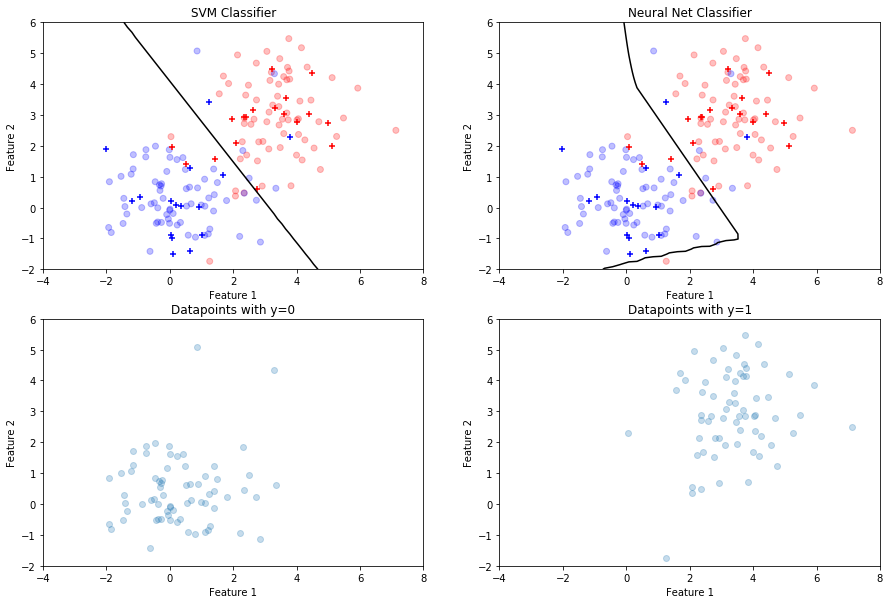

In [73]:
X = data[:,0:2]
y = data[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)

xx, yy = np.meshgrid(np.linspace(-4, 8.5, 50),
                     np.linspace(-2, 6, 50))

# SVM Classifier

svm_clf = SVC(C=1, kernel='linear', probability=True, random_state=1).fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
Z_svm = svm_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])   # Calculate the decision boundary
Z_svm = Z_svm[:, 1].reshape(xx.shape)

print('------------------------------------ SVM Classifier ------------------------------------ ')
print(f'We accurately labeled {(y_test == y_pred_svm).sum()} points out of {y_test.shape[0]} in the test set,'\
      f'for an accuracy of {round((y_test == y_pred_svm).sum()/y_test.shape[0] *100, 2)}%')
print('\n')

# Neural Net CLassifier
nn_clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2),
                       learning_rate='adaptive', random_state=1).fit(X_train, y_train)
y_pred_nn = nn_clf.predict(X_test)
Z_nn = nn_clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])   # Calculate the decision boundary
Z_nn = Z_nn[:, 1].reshape(xx.shape)

print('------------------------------------ Neural Net Classifier ------------------------------------ ')
print(f'We accurately labeled {(y_test == y_pred_nn).sum()} points out of {y_test.shape[0]} in the test set,'\
      f'for an accuracy of {round((y_test == y_pred_nn).sum()/y_test.shape[0] *100, 2)}%')
print('\n')

fig, axs = plt.subplots(2,2, figsize=(15,10))

# Naive Bayes Plots
axs[0,0].scatter(X_train[:,0], X_train[:,1],c=y_train, cmap='bwr', marker='o', alpha=0.25)
axs[0,0].scatter(X_test[:,0], X_test[:,1],c=y_test, cmap='bwr', marker='+')
axs[0,0].contour(xx, yy, Z_svm, [0.5], colors='k')
axs[0,0].set_xlim([-4, 8])
axs[0,0].set_ylim([-2, 6])
axs[0,0].set_title('SVM Classifier')
axs[0,0].set_xlabel('Feature 1')
axs[0,0].set_ylabel('Feature 2')

# Logistic Regression Plots Plots
axs[0,1].scatter(X_train[:,0], X_train[:,1],c=y_train, cmap='bwr', marker='o', alpha=0.25)
axs[0,1].scatter(X_test[:,0], X_test[:,1],c=y_test, cmap='bwr', marker='+')
axs[0,1].contour(xx, yy, Z_nn, [0.5], colors='k')
axs[0,1].set_xlim([-4, 8])
axs[0,1].set_ylim([-2, 6])
axs[0,1].set_title('Neural Net Classifier')
axs[0,1].set_xlabel('Feature 1')
axs[0,1].set_ylabel('Feature 2')

axs[1,0].scatter(X_train[np.where(y_train==0),0], X_train[np.where(y_train==0),1], cmap='bwr', marker='o', alpha=0.25)
axs[1,0].set_xlim([-4, 8])
axs[1,0].set_ylim([-2, 6])
axs[1,0].set_title('Datapoints with y=0')
axs[1,0].set_xlabel('Feature 1')
axs[1,0].set_ylabel('Feature 2')

axs[1,1].scatter(X_train[np.where(y_train==1),0], X_train[np.where(y_train==1),1], cmap='bwr', marker='o', alpha=0.25)
axs[1,1].set_xlim([-4, 8])
axs[1,1].set_ylim([-2, 6])
axs[1,1].set_title('Datapoints with y=1')
axs[1,1].set_xlabel('Feature 1')
axs[1,1].set_ylabel('Feature 2')

plt.show()

We can see that datapoints with `y=0` as the label appear more often in the bottom left of the plots, while datapoints with the label `y=1` appear more often in the top right of the plots. 

Because the SVM classifier was specifically chosen to use a linear kernel, we can see that the decision boundary is linear. The default kernel with the package I've used is a radial basis function kernel, and that had a very nonlinear decision boundary. 

We can see that the neural network has a very nonlinear decision boundary, although there appears to be a rather linear portion in the center of the plot, right between the two groups of datapoints.

I am surprised that they predict the test datapoints equally well, however upon inspection only one of the test datapoints is near either decision boundary. Some of the training datapoints are classified differently between the two models, thus if we were to split the original dataset differently, we may get different results on the test dataset.

**Part Two (Handwritten Digits Classification).**

Repear the above part `a)` using the MNIST dataset of handwritten digits. Give digit `6` the label `y=1`, and give digit `2` the label `y=0`. All the pixels in each image will be the predictor variables for that sample.

Report the classification accuracy on the test data for each of the two classifiers. Comment on their performance. Which performs better? Make a guess why it performs better in this setting.

In [75]:
X = loadmat('data.mat')['data'].T
y = loadmat('label.mat')['trueLabel'].T
y = (y-2)/4     # Set all `2` digits to 0, and all `6` digits to 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=True)
y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])

# SVM Classifier
svm_clf = SVC(C=1, kernel='linear', probability=True, random_state=1).fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
print('------------------------------------ SVM Classifier ------------------------------------ ')
print(f'We accurately labeled {(y_test == y_pred_svm).sum()} points out of {y_test.shape[0]} in the test set,'\
      f'for an accuracy of {round((y_test == y_pred_svm).sum()/y_test.shape[0] *100, 2)}%')
print('\n')


# Neural Net CLassifier
nn_clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 2),
                       learning_rate='adaptive', random_state=1).fit(X_train, y_train)
y_pred_nn = nn_clf.predict(X_test)
print('------------------------------------ Neural Net Classifier ------------------------------------ ')
print(f'We accurately labeled {(y_test == y_pred_nn).sum()} points out of {y_test.shape[0]} in the test set,'\
      f'for an accuracy of {round((y_test == y_pred_nn).sum()/y_test.shape[0] *100, 2)}%')
print('\n')

------------------------------------ SVM Classifier ------------------------------------ 
We accurately labeled 389 points out of 398 in the test set,for an accuracy of 97.74%


------------------------------------ Neural Net Classifier ------------------------------------ 
We accurately labeled 392 points out of 398 in the test set,for an accuracy of 98.49%




Both models performed exceptionally well, even when the decision boundary for the SVM classifier was forced to be linear. I would imagine that forcing the decision boundary to be linear is the reason for the slightly worse performance of the SVM model, compared to the neural network. 

It is well known that neural networks are one of the preferred model types for image classification. This example illustrates their power at classifying images.

**3) AdaBoost.**

Consider the following dataset plotted below. The first two coordinates represent the value of two features, and the last coordinate is the binary label of the data.

$$ X_1 = (-1, 0, +), \quad X_2 = (-0.5, 0.5, +), \quad X_3 = (0, 1, -), \quad X_4 = (0.5, 1, -) $$

$$ X_5 = (1, 0, +), \quad X_2 = (1, -1, +), \quad X_3 = (0, -1, -), \quad X_4 = (0, 0, -) $$

![](hw.png)

In this problem, you will run through `T=3` iterations of AdaBoost with decision stmps (axis-aligned half planes) as weak learners.

**a) For each iteration `t=1,2,3`, compute $\epsilon_t$, $\alpha_t$, $Z_t$, and $D_t$ by hand.** (i.e. show all the calculation steps) and draw the decision stumps on Figure 1. Recall that $Z_t$ is the normalization factor to ensure that the weights $D_t$ sum to one. At each iteration, you may specify any reasonble decision rule $h_t$ as you would like.

The two decision stups are shown below. $h_1$ is drawn in blue and $h_2$ is drawn in red. The points that are incorrectly labeled by each stump are circled in the color of the decision stump classifier.

![](AdaBoost_with_lines.jpg)

**1) Decision Stump 1 - $h_1$**

Decision stump 1 misclassifies points $x_5$ and $x_6$. The is is shown in the table below, as these points are colored red.

You can see that the values for $D_t (5)$ and $D_t (6)$ have increased, giving them more priority. This is carried into the next step, and highlighted in yellow.

**2) Decision Stump 2 - $h_2$**

Decision stump 1 misclassifies points $x_1$ and $x_1$. The is is shown in the table below, as these points are colored red.

You can see that the values for $D_t (1)$ and $D_t (1)$ have increased, giving them more priority. This is carried into the next step, and highlighted in yellow. You can also see that the values for $D_t (5)$ and $D_t (6)$ have dropped, since they were classified correctly by $h_2$.


The calculations for $\epsilon_t$, $\alpha_t$, $Z_t$, and $D_t$ were done using excel formulas. 

![](Adaboost.png)

**b) What is the training error of AdaBoost? Give a one-sentence reason for why AdaBoost outperforms a single decision stump.**

The results were also calculated using excel formulas, using the actual value and whether or not each classifier predicted the value correctly. The formula for the final prediction for $x_1$ is shown below. 

![](results2.png)

The training error of AdaBoost in this example is 0. This is because it was able to correctly classify all of the training data points. 

AdaBoost outperforms a single decision tree becasue it crowd-sources the answer from multiple decision trees, while giving less weight to the trees that perform poorly, and more weight to the trees that perform well. 